In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xmltodict

In [5]:
def get_result(file):
    in_file = open(file, 'r')
    lines = []
    for line in in_file:
        lines.append(line.split())

    for x in range(len(lines)):
        lines[x][0] = int(lines[x][0])
        lines[x][1], lines[x][2] = float(lines[x][1]), float(lines[x][2])

    b = sorted(lines, key=lambda s: s[0])


    mu = []
    h = []
    for x in range(len(b)):
        mu.append(b[x][1])
        h.append(b[x][2])
    return (mu, h)

def dots(y, o, r):
    col = [] 
    
    for i in range(39): 
        if i == r: 
            col.append('red')
        elif i == o:
            col.append('orange')
        elif i == y:
            col.append('yellow')
        else: 
            col.append('lightgreen')  
    return col

In [14]:
def En1(j, n, m):
    Energy = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w2/t-1/"
    for i in range(n, m, 4):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + 4
    return Energy
e4 = En1(1, 1, 38)
e5 = En1(2, 2, 39)
e6 = En1(0, 2, 39)
e4.append(En1(39, 39, 40)[0])
e5.append(En1(40, 40, 41)[0])
e6.append(En1(38, 40, 41)[0])

h1 = []
mu1 = []
for x in range(len(e4)):
    h1.append((e6[x] - e4[x]) / 2)
    mu1.append((e5[x] - e4[x]) / 2)

In [17]:
h02, mu02 = get_result('result-ED-PP-02.txt')
mu05, h05 = get_result('result-ED-PP-W=2-t1.txt')

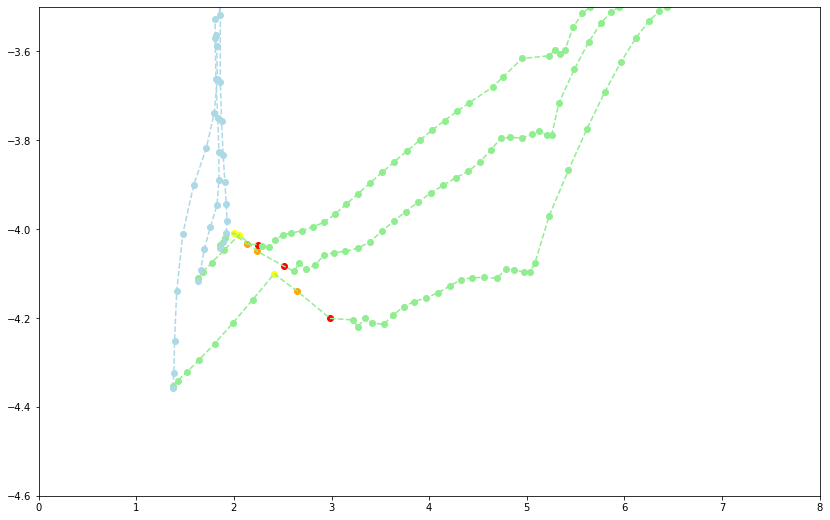

In [19]:
file_names = ['result-W=2.txt', 'result-W=2-0.5.txt', 'result-W=2-0.2.txt']
col = [dots(7, 8, 9), dots(4, 5, 6), dots(2, 3, 4)]
xscale = 8

plt.figure(figsize=(14, 9))

plt.plot(h1, mu1, 'o--', color='lightblue')## ED-PP t=1
plt.plot(mu05, h05, 'o--', color='lightblue') ## ED-PP для t1 = 0.5
plt.plot(h02, mu02, 'o--', color='lightblue') ##ED-PP t1 = 0.2

for j in range(len(file_names)):
    mu, h = get_result(file_names[j])
    for i in range(0, len(mu)): 
        plt.scatter(h[i], mu[i], marker='o', c = col[j][i])
    plt.plot(h, mu, '--', color='lightgreen')

plt.axis([0, xscale, -4.6, -3.5])
plt.show()